In [ ]:
pip install pandas==1.2.0

     |████████████████████████████████| 9.9 MB 8.6 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


In [15]:
# Importing models
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, f1_score

import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xg
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv("data.csv")
df

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CC_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


## Components

**Cement** (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable<br>
**Blast Furnace Slag** (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable<br>
**Fly Ash** (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable<br>
**Water** (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable<br>
**Superplasticizer** (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable<br>
**Coarse Aggregate** (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable<br>
**Fine Aggregate** (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable<br>
**Age** -- quantitative -- Day (1~365) -- Input Variable<br>
**Concrete compressive strength** -- quantitative -- MPa -- Output Variable<br>

In [4]:
# Check for null values. There is no null values.
df.isnull().any()

Cement               False
BlastFurnaceSlag     False
FlyAsh               False
Water                False
Superplasticizer     False
CoarseAggregate      False
FineAggregate        False
Age                  False
CC_Strength          False
dtype: bool

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Cement             1030 non-null   float64
 1   BlastFurnaceSlag   1030 non-null   float64
 2   FlyAsh             1030 non-null   float64
 3   Water              1030 non-null   float64
 4   Superplasticizer   1030 non-null   float64
 5   CoarseAggregate    1030 non-null   float64
 6   FineAggregate      1030 non-null   float64
 7   Age                1030 non-null   int64  
 8   CC_Strength        1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
df.describe()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CC_Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


## <b>Ingredients Distribution</b>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103

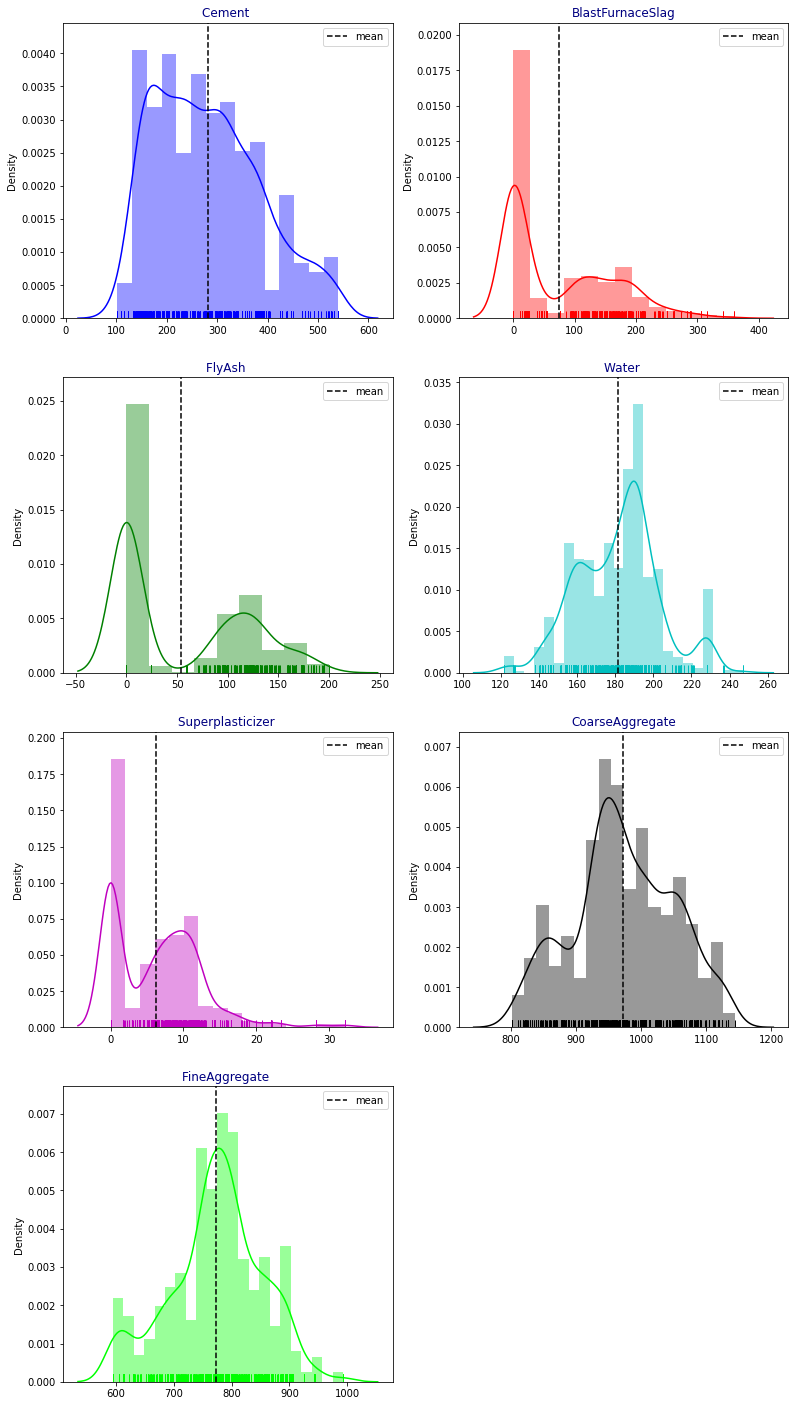

In [7]:
cols = ['Cement ', 'BlastFurnaceSlag', 'FlyAsh ', 'Water ', 'Superplasticizer ','CoarseAggregate', 'FineAggregate ']
length = len(cols)
cs = ["b","r","g","c","m","k","lime"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

In [8]:
df.corr()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CC_Strength
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
BlastFurnaceSlag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
FlyAsh,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
CoarseAggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
FineAggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
CC_Strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


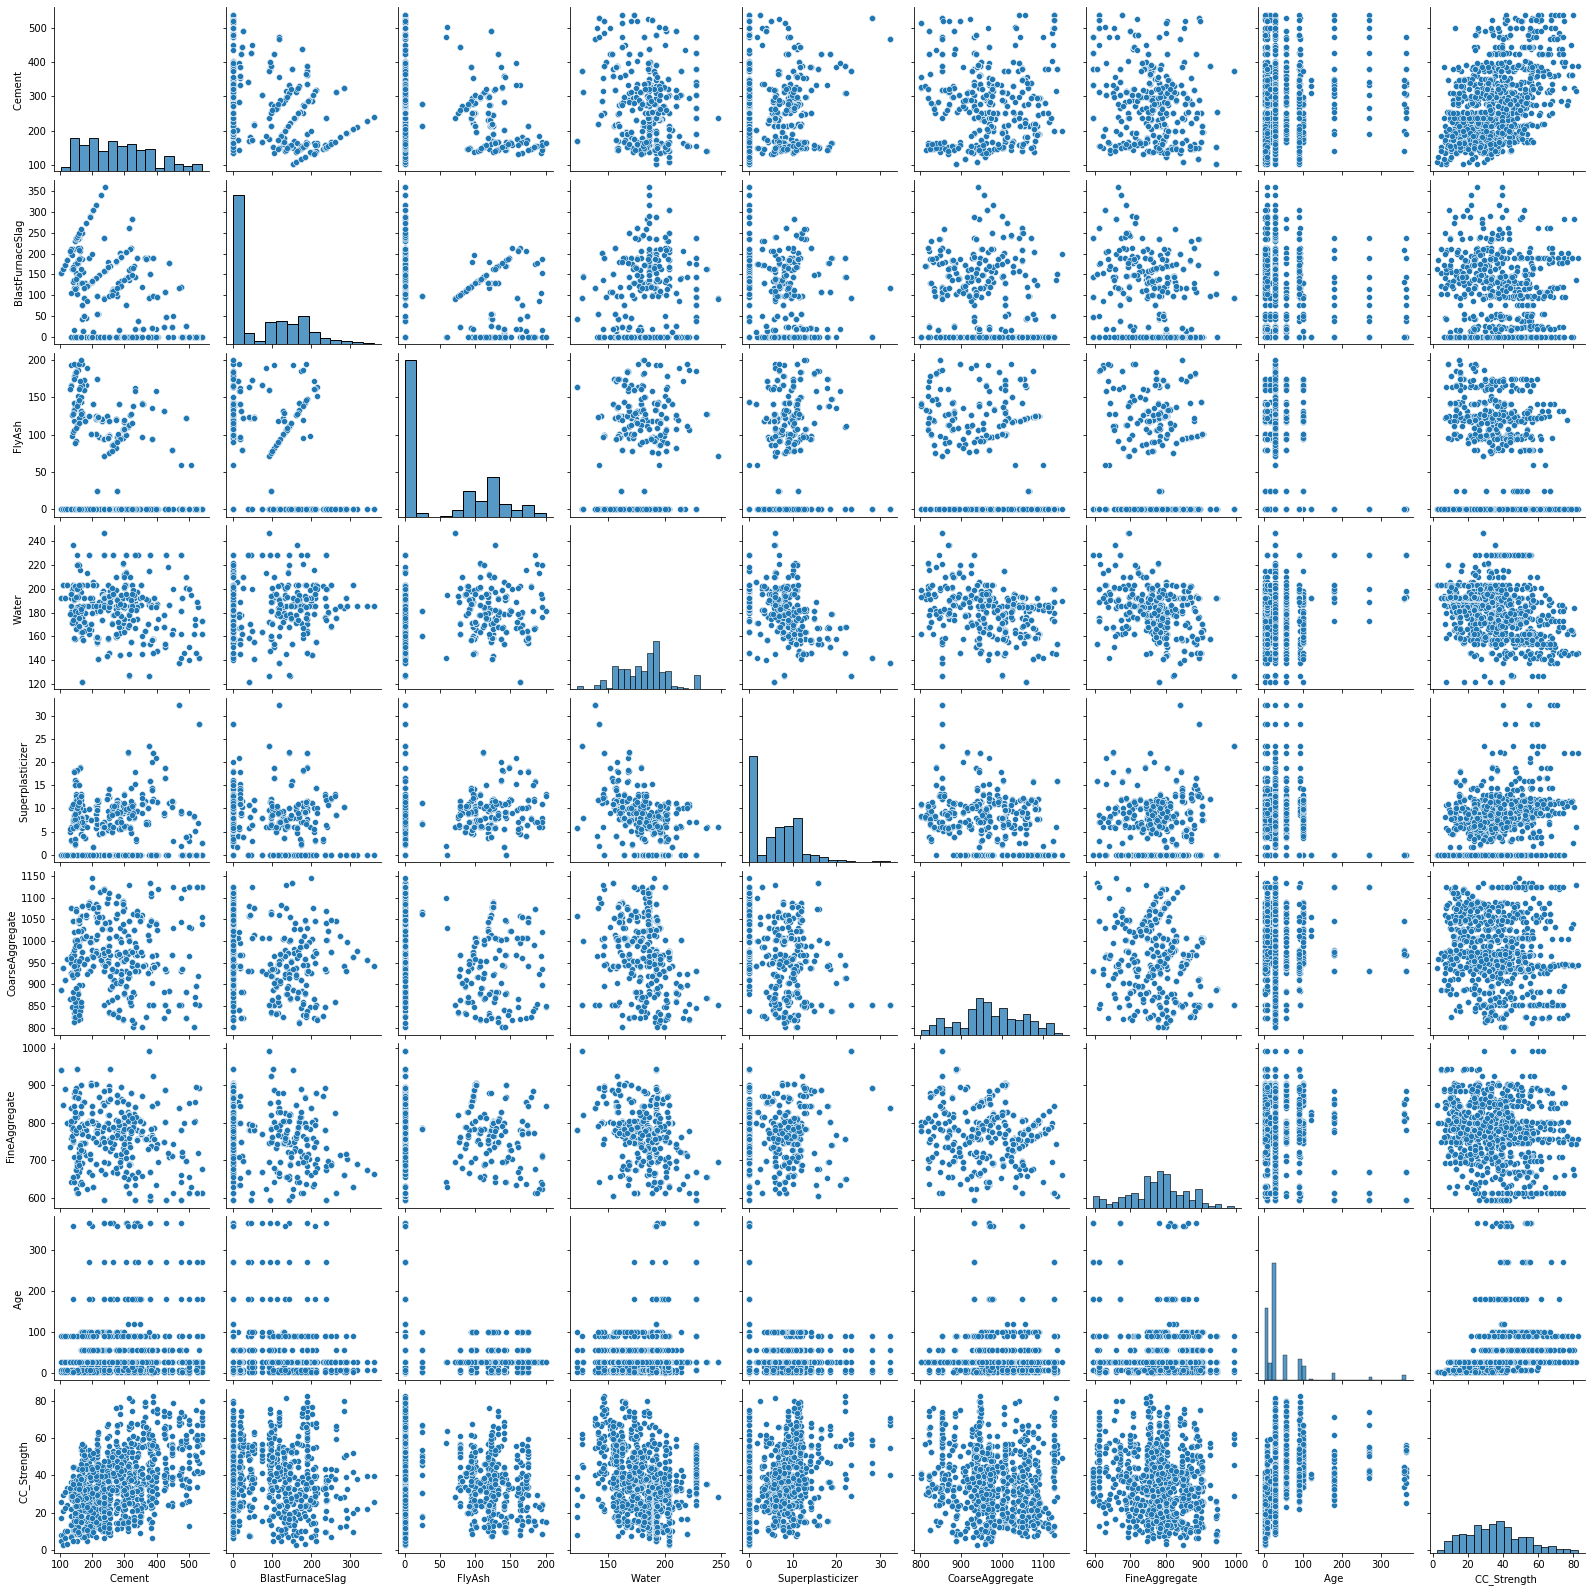

In [ ]:
sns.pairplot(df)
plt.show()

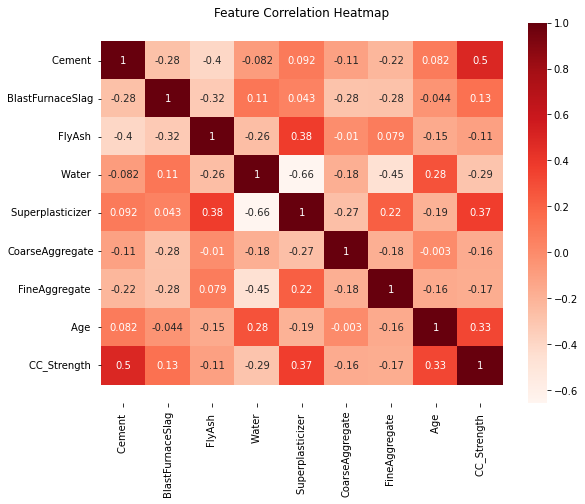

In [9]:
corr = df.corr()

plt.figure(figsize=(9,7))
sns.heatmap(corr, annot=True, cmap='Reds')
b, t = plt.ylim()
plt.ylim(b+0.5, t-0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
df.columns

Index(['Cement ', 'BlastFurnaceSlag', 'FlyAsh ', 'Water ', 'Superplasticizer ',
       'CoarseAggregate', 'FineAggregate ', 'Age ', 'CC_Strength '],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Compressive Strength Distribution')

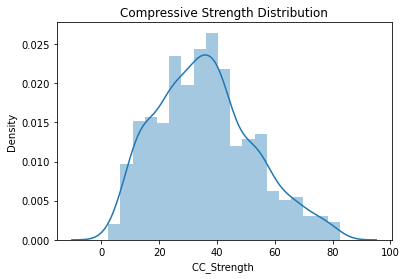

In [ ]:
ax = sns.distplot(df["CC_Strength "])
ax.set_title("Compressive Strength Distribution")

In [10]:
X = df.iloc[:,:-1]         # Features - All columns but last
y = df.iloc[:,-1]          # Target - Last Column

In [11]:
# input features
X

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [12]:
# output feature
y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: CC_Strength , Length: 1030, dtype: float64

### <b>Split Train/Test Dataset</b>

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

### <b>Standard Scaler</b>

<b><i>Why to standardize before fitting a ML model?</i></b>
Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise standardized (μ=0, σ=1) is usually used prior to model fitting.

In [14]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# <b><i>Linear Regression</i></b>

In [ ]:
# Linear Regression
lr = LinearRegression()
# Lasso Regression
lasso = Lasso()
# Ridge Regression
ridge = Ridge()

# Fitting models on Training data 
lr.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

# Making predictions on Test data
y_pred_lr = lr.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)

### <b>Comparing the Root Mean Squared Error (RMSE), Mean Squared Error (MSE), Mean Absolute Error(MAE) and R2 Score.</b>

### <b>RMSE</b>
"""
Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors).
Residuals are a measure of how far from the regression line data points are; RMSE is a measure of 
how spread out these residuals are. In other words, it tells you how concentrated the data is 
around the line of best fit.
"""

### <b>MSE</b>
"""
The Mean Squared Error (MSE) is a measure of how close a fitted line is to data points. 
For every data point, you take the distance vertically from the point to the corresponding 
y value on the curve fit (the error), and square the value.
"""

### <b>MAE</b>
"""
 MAE measures the average magnitude of the errors in a set of predictions, without 
 considering their direction. It’s the average over the test sample of the absolute differences 
 between prediction and actual observation where all individual differences have equal weight.
"""

### <b>R2 score</b>
"""
R-squared is a statistical measure that represents the proportion of the variance for
a dependent variable that's explained by an independent variable or variables in a regression model.
"""

In [ ]:
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
lr_r2 = r2_score(y_test, y_pred_lr)
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
lasso_r2 = r2_score(y_test, y_pred_lasso)
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
ridge_r2 = r2_score(y_test, y_pred_ridge)

In [ ]:
print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""LinearRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lr)),mean_squared_error(y_test, y_pred_lr),
            mean_absolute_error(y_test, y_pred_lr), r2_score(y_test, y_pred_lr)))
print("""LassoRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lasso)),mean_squared_error(y_test, y_pred_lasso),
            mean_absolute_error(y_test, y_pred_lasso), r2_score(y_test, y_pred_lasso)))
print("""RidgeRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_ridge)),mean_squared_error(y_test, y_pred_ridge),
            mean_absolute_error(y_test, y_pred_ridge), r2_score(y_test, y_pred_ridge)))

Model			 RMSE 		 MSE 		 MAE 		 R2
LinearRegression 	 10.28 		 105.76 	8.23 		0.57
LassoRegression 	 10.68 		 114.11 	8.65 		0.54
RidgeRegression 	 10.29 		 105.84 	8.24 		0.57


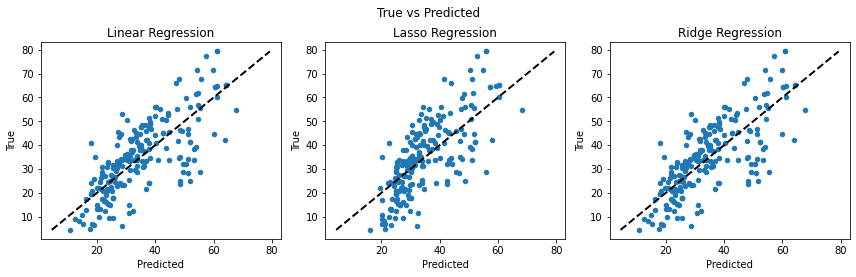

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4))

ax1.scatter(y_pred_lr, y_test, s=20)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax1.set_ylabel("True")
ax1.set_xlabel("Predicted")
ax1.set_title("Linear Regression")

ax2.scatter(y_pred_lasso, y_test, s=20)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax2.set_ylabel("True")
ax2.set_xlabel("Predicted")
ax2.set_title("Lasso Regression")

ax3.scatter(y_pred_ridge, y_test, s=20)
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax3.set_ylabel("True")
ax3.set_xlabel("Predicted")
ax3.set_title("Ridge Regression")

fig.suptitle("True vs Predicted")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# <b><i>Decision Tree</i></b>

In [ ]:
dt = DecisionTreeRegressor()

dt_model = dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Decision Tree Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_dt)),mean_squared_error(y_test, y_pred_dt),
            mean_absolute_error(y_test, y_pred_dt), r2_score(y_test, y_pred_dt)))

Model				 RMSE 		 MSE 		 MAE 		 R2
Decision Tree Regressor 	 7.46 		 55.60 		4.65 		0.77


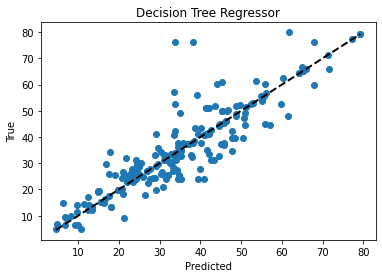

In [ ]:
plt.scatter(y_test, y_pred_dt)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Decision Tree Regressor")
plt.show()

In [ ]:
dt_rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))
dt_r2 = r2_score(y_test, y_pred_dt)

Text(0.5, 0, 'Variable Severity Levels')

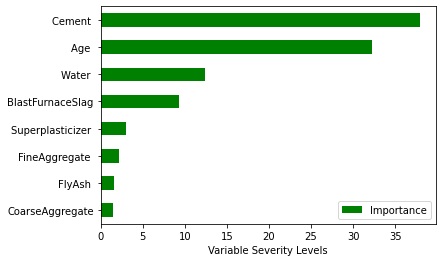

In [ ]:
Importance = pd.DataFrame({"Importance":dt_model.feature_importances_*100}, index=X.columns)
Importance.sort_values(by='Importance', axis=0, ascending=True).iloc[-10:,:].plot(kind='barh', color='green')
plt.xlabel("Variable Severity Levels")

This time used feature selection from feature importance that seen above. used 4 feature that is cement, age, water and Blast Furnace slag. And here is a little bit improvement was observed.

In [ ]:
dt = pd.read_csv("data.csv")

X_tuned = dt[["Cement ", "Age ", "Water ", "BlastFurnaceSlag"]]
y_tuned = dt[["CC_Strength "]]
X_train, X_test, y_train, y_test = train_test_split(X_tuned, y_tuned, test_size=0.2, random_state=2)

In [ ]:
dt = DecisionTreeRegressor()

dt_importance = dt.fit(X_train, y_train)

y_pred_dt = dt_importance.predict(X_test)

print("Model\t\t\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Decision Tree Regressor with feature selection \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_dt)),mean_squared_error(y_test, y_pred_dt),
            mean_absolute_error(y_test, y_pred_dt), r2_score(y_test, y_pred_dt)))

Model						 RMSE 		 MSE 		 MAE 		 R2
Decision Tree Regressor with feature selection 	 7.00 		 49.03 		4.51 		0.80


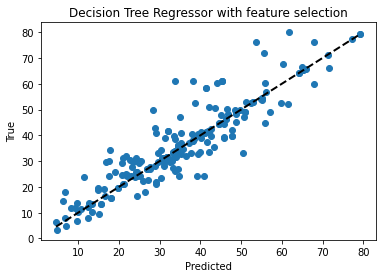

In [ ]:
plt.scatter(y_test, y_pred_dt)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Decision Tree Regressor with feature selection")
plt.show()

# <b><i>Random Forest</i></b>

Model				 RMSE 		 MSE 		 MAE 		 R2
Random Forest Regressor 	 5.14 		 26.41 		3.52 		0.89


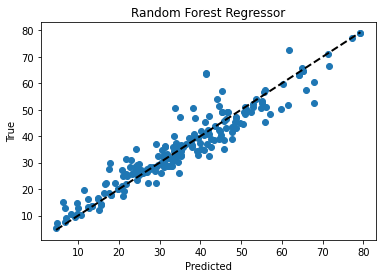

In [ ]:
rf = RandomForestRegressor(n_estimators=100)

rf_model = rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Random Forest Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_rf)),mean_squared_error(y_test, y_pred_rf),
            mean_absolute_error(y_test, y_pred_rf), r2_score(y_test, y_pred_rf)))

plt.scatter(y_test, y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Random Forest Regressor")
plt.show()

In [ ]:
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_r2 = r2_score(y_test, y_pred_rf)

Text(0.5, 0, 'Variable Severity Levels')

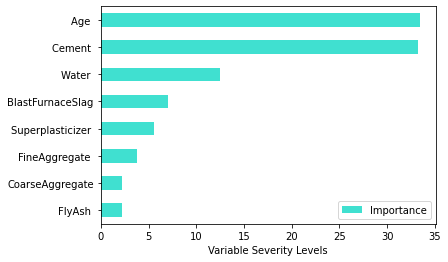

In [ ]:
Importance = pd.DataFrame({"Importance":rf_model.feature_importances_*100}, index=X.columns)
Importance.sort_values(by='Importance', axis=0, ascending=True).iloc[-10:,:].plot(kind='barh', color='turquoise')
plt.xlabel("Variable Severity Levels")

### Feature Selection

In [ ]:
dt = pd.read_csv("data.csv")

X_tuned = dt[["Cement ", "Age ", "Water ", "BlastFurnaceSlag"]]
y_tuned = dt[["CC_Strength "]]
X_train, X_test, y_train, y_test = train_test_split(X_tuned, y_tuned, test_size=0.2, random_state=2)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
rf = RandomForestRegressor(n_estimators=100)

rf_model = rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Model\t\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Random Forest Regressor with feature selection \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_rf)),mean_squared_error(y_test, y_pred_rf),
            mean_absolute_error(y_test, y_pred_rf), r2_score(y_test, y_pred_rf)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Model					 RMSE 		 MSE 		 MAE 		 R2
Random Forest Regressor with feature selection 	 5.38 		 28.92 		3.76 		0.88


# <b><i>Support Vector Regression</i></b>

In [ ]:
svr_model = SVR(kernel="linear").fit(X_train, y_train)

In [ ]:
y_pred_svr = svr_model.predict(X_test)

In [ ]:
svr_score = svr_model.score(X_test, y_test)
svr_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_svr))
svr_r2 = r2_score(y_test, y_pred_svr)

In [ ]:
print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Support Vector Regression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_svr)),mean_squared_error(y_test, y_pred_svr),
            mean_absolute_error(y_test, y_pred_svr), r2_score(y_test, y_pred_svr)))

Model				 RMSE 		 MSE 		 MAE 		 R2
Support Vector Regression 	 10.15 		 102.98 	7.95 		0.58


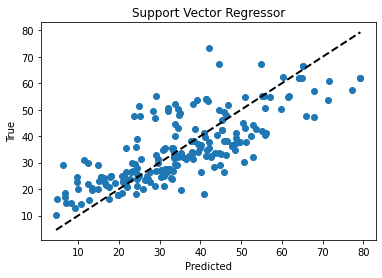

In [ ]:
plt.scatter(y_test, y_pred_svr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Support Vector Regressor")
plt.show()

#### support vector machine with RBF

In [ ]:
svr_rbf = SVR(kernel="rbf").fit(X_train, y_train)
y_pred_svr_rbf = svr_rbf.predict(X_test)

In [ ]:
print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Support Vector Regression \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_svr_rbf)),mean_squared_error(y_test, y_pred_svr_rbf),
            mean_absolute_error(y_test, y_pred_svr_rbf), r2_score(y_test, y_pred_svr_rbf)))

Model				 RMSE 		 MSE 		 MAE 		 R2
Support Vector Regression 	 9.13 		 83.39 		7.44 		0.66


# <b><i>KNN Neighbor</i></b>

In [ ]:
 knn_model = KNeighborsRegressor().fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [ ]:
knn_rmse =  np.sqrt(mean_squared_error(y_test, y_pred_knn))
knn_r2 = r2_score(y_test, y_pred_knn)

In [ ]:
print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""KNN Neighbor \t\t\t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_knn)),mean_squared_error(y_test, y_pred_knn),
            mean_absolute_error(y_test, y_pred_knn), r2_score(y_test, y_pred_knn)))

Model				 RMSE 		 MSE 		 MAE 		 R2
KNN Neighbor 			 8.95 		 80.13 		6.85 		0.67


# <b><i>XGBooster</i></b>

In [ ]:
xgb = xg.XGBRegressor(learning_rate=0.2, max_depth=3, n_estimators=200, n_jobs=1, objective='reg:linear')
xgb_model = xgb.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

[06:37:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
xgb_rmse =  np.sqrt(mean_squared_error(y_test, y_pred_xgb))
xgb_r2 = r2_score(y_test, y_pred_xgb)

In [ ]:
print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""XGBooster Regressor \t\t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_xgb)),mean_squared_error(y_test, y_pred_xgb),
            mean_absolute_error(y_test, y_pred_xgb), r2_score(y_test, y_pred_xgb)))

Model				 RMSE 		 MSE 		 MAE 		 R2
XGBooster Regressor 		 4.86 		 23.63 		3.23 		0.90


## <b><i>Model RMSE Comparison</i></b>




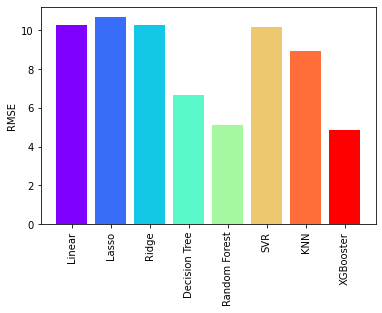

In [ ]:
colors = cm.rainbow(np.linspace(0,1,8))

height = [lr_rmse, lasso_rmse, ridge_rmse, dt_rmse, rf_rmse,svr_rmse, knn_rmse, xgb_rmse]
bars = ('Linear', 'Lasso', 'Ridge', 'Decision Tree', 'Random Forest','SVR', 'KNN', "XGBooster")

plt.bar(bars, height, color=colors)
plt.xticks(range(len(bars)), bars, rotation='vertical')
plt.ylabel('RMSE')
plt.show()

## <b><i>Model R2 Score Comparison</i></b>

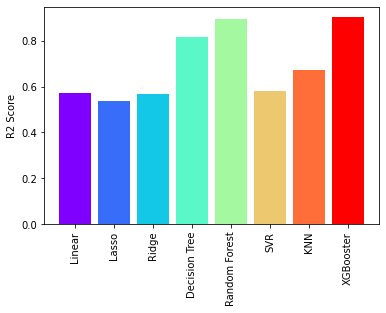

In [ ]:
colors = cm.rainbow(np.linspace(0,1,8))

height = [lr_r2, lasso_r2, ridge_r2, dt_r2, rf_r2, svr_r2, knn_r2, xgb_r2]
bars = ('Linear', 'Lasso', 'Ridge', 'Decision Tree', 'Random Forest','SVR', 'KNN', "XGBooster")

plt.bar(bars, height, color=colors)
plt.xticks(range(len(bars)), bars, rotation='vertical')
plt.ylabel('R2 Score')
plt.show()

# <b><i>Neural Network</i></b>

MLPRegressor trains iteratively since at each time step the partial derivatives of the loss function with respect to the model parameters are computed to update the parameters.

It can also have a regularization term added to the loss function that shrinks model parameters to prevent overfitting.

This implementation works with data represented as dense and sparse numpy arrays of floating point values.

**random_state int, RandomState instance, default=None**
Determines random number generation for weights and bias initialization, train-test split if early stopping is used, and batch sampling when solver=’sgd’ or ‘adam’. Pass an int for reproducible results across multiple function calls. See Glossary.

**activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’},** default=’relu’
Activation function for the hidden layer.


*   ‘identity’, no-op activation, useful to implement linear bottleneck, returns f(x) = x
*   ‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).
*   ‘tanh’, the hyperbolic tan function, returns f(x) = tanh(x).
*   ‘relu’, the rectified linear unit function, returns f(x) = max(0, x)

**max_iter int, default=200** Maximum number of iterations. The solver iterates until convergence (determined by ‘tol’) or this number of iterations. For stochastic solvers (‘sgd’, ‘adam’), note that this determines the number of epochs (how many times each data point will be used), not the number of gradient steps.



In [ ]:
regr = MLPRegressor(random_state=1, max_iter=750).fit(X_train, y_train)
regr.predict(X_test)
regr.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (750) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.853539684778893

### ***Model Tuning***

**Cross-validation: evaluating estimator performance** The goal of cross-validation is to test the model's ability to predict new data that was not used in estimating it, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset, for instance from a real problem).

In [ ]:
mlp_param = {
    "alpha": [0.1,0.01,0.3,0.8,0.001],
    "max_iter": [200, 400, 600, 750, 1000],
    "activation": ["relu","logistic"]
    }

mlp_cv_model = GridSearchCV(regr, mlp_param, cv=10)

In [ ]:
mlp_cv_model.fit(X_train, y_train)
mlp_cv_model.predict(X_test)
mlp_cv_model.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

0.853539684778893

In [ ]:
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.3, 'max_iter': 1000}

In [ ]:
regr_tuned = MLPRegressor(random_state=1, max_iter=1000, alpha=0.3, activation='relu').fit(X_train, y_train)
regr_tuned.predict(X_test)
regr_tuned.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.8754547548141351

#################################
#################################
# CLASSIFIER 
#################################
#################################

In [16]:
df = pd.read_csv('data.csv')

In [17]:
concrete_class=[]
for i in df['CC_Strength ']:
  if i<17:
    concrete_class.append('C16')
  elif i < 19:
    concrete_class.append('C18')
  elif i < 22.5:
    concrete_class.append('C20')
  elif i < 27.5:
    concrete_class.append('C25')
  elif i < 32.5:
    concrete_class.append('C30')
  elif i< 37.5:
    concrete_class.append('C35')
  elif i < 42.5:
    concrete_class.append('C40')
  elif i < 47.5:
    concrete_class.append('C45')
  else:
    concrete_class.append('C50')
df['concrete_class'] = concrete_class
df

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CC_Strength,concrete_class
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,C50
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,C50
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,C40
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,C40
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,C45
...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,C45
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18,C30
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70,C25
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77,C35


In [18]:
df['concrete_class'].value_counts()

C50    239
C16    148
C35    132
C40    128
C25    114
C30    102
C45     80
C20     54
C18     33
Name: concrete_class, dtype: int64

In [19]:
df = df.drop(["CC_Strength "], axis=1)
df

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,concrete_class
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,C50
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,C50
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,C40
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,C40
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,C45
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,C45
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,C30
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,C25
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,C35


In [20]:
X = df.iloc[:,:-1]         # Features - All columns but last
y = df.iloc[:,-1]          # Target - Last Column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [21]:
X

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [22]:
y

0       C50
1       C50
2       C40
3       C40
4       C45
       ... 
1025    C45
1026    C30
1027    C25
1028    C35
1029    C30
Name: concrete_class, Length: 1030, dtype: object

### Decision Tree Classifier

In [23]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)

In [24]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.529126213592233

In [25]:
confusion_matrix(y_test, y_pred)

array([[18,  4,  2,  1,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  2,  0,  0,  0,  2,  0],
       [ 1,  4,  2,  4,  1,  0,  1,  0,  0],
       [ 1,  1,  2, 14,  4,  0,  0,  0,  0],
       [ 0,  1,  1,  8, 10,  0,  3,  2,  0],
       [ 0,  0,  2,  2,  3, 12,  6,  2,  2],
       [ 0,  0,  0,  1,  1,  5,  9,  5,  3],
       [ 0,  0,  0,  1,  0,  2,  3, 11,  3],
       [ 0,  0,  0,  0,  1,  0,  5,  4, 32]])

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         C16       0.90      0.69      0.78        26
         C18       0.09      0.20      0.13         5
         C20       0.22      0.15      0.18        13
         C25       0.42      0.64      0.51        22
         C30       0.48      0.40      0.43        25
         C35       0.63      0.41      0.50        29
         C40       0.33      0.38      0.35        24
         C45       0.42      0.55      0.48        20
         C50       0.80      0.76      0.78        42

    accuracy                           0.53       206
   macro avg       0.48      0.46      0.46       206
weighted avg       0.56      0.53      0.54       206



### Random Forest Classifier

In [27]:
rf_model = RandomForestClassifier().fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [28]:
accuracy_score(y_test, y_pred)

0.5631067961165048

In [29]:
confusion_matrix(y_test, y_pred)

array([[22,  2,  1,  1,  0,  0,  0,  0,  0],
       [ 2,  1,  0,  2,  0,  0,  0,  0,  0],
       [ 1,  1,  5,  5,  1,  0,  0,  0,  0],
       [ 1,  2,  0,  9,  8,  0,  2,  0,  0],
       [ 0,  0,  2,  6,  9,  1,  5,  1,  1],
       [ 0,  0,  0,  1,  5, 15,  5,  1,  2],
       [ 0,  0,  0,  1,  0,  8, 10,  1,  4],
       [ 0,  0,  0,  1,  0,  3,  0,  9,  7],
       [ 0,  0,  0,  0,  0,  1,  1,  4, 36]])

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         C16       0.85      0.85      0.85        26
         C18       0.17      0.20      0.18         5
         C20       0.62      0.38      0.48        13
         C25       0.35      0.41      0.38        22
         C30       0.39      0.36      0.37        25
         C35       0.54      0.52      0.53        29
         C40       0.43      0.42      0.43        24
         C45       0.56      0.45      0.50        20
         C50       0.72      0.86      0.78        42

    accuracy                           0.56       206
   macro avg       0.51      0.49      0.50       206
weighted avg       0.56      0.56      0.56       206



### MLP Classifier

In [31]:
mlpc = MLPClassifier().fit(X_train, y_train)
y_pred = mlpc.predict(X_test)

In [32]:
accuracy_score(y_test, y_pred)

0.2815533980582524

In [33]:
confusion_matrix(y_test, y_pred)

array([[ 3,  9,  3, 10,  1,  0,  0,  0,  0],
       [ 0,  2,  1,  2,  0,  0,  0,  0,  0],
       [ 0,  5,  2,  6,  0,  0,  0,  0,  0],
       [ 0,  1,  5,  9,  2,  1,  0,  0,  4],
       [ 0,  0,  5,  6,  5,  2,  0,  0,  7],
       [ 0,  1,  0,  4,  8,  1,  0,  5, 10],
       [ 0,  1,  1,  0,  3,  2,  1,  3, 13],
       [ 0,  0,  1,  1,  4,  1,  0,  0, 13],
       [ 0,  0,  0,  0,  2,  1,  0,  4, 35]])

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         C16       1.00      0.12      0.21        26
         C18       0.11      0.40      0.17         5
         C20       0.11      0.15      0.13        13
         C25       0.24      0.41      0.30        22
         C30       0.20      0.20      0.20        25
         C35       0.12      0.03      0.05        29
         C40       1.00      0.04      0.08        24
         C45       0.00      0.00      0.00        20
         C50       0.43      0.83      0.56        42

    accuracy                           0.28       206
   macro avg       0.36      0.24      0.19       206
weighted avg       0.41      0.28      0.23       206

